# Technical Analysis and Visualization of Stock Data


## 1. Importing Libraries


In [1]:
import talib
import yfinance as yf
import matplotlib.pyplot as plt

## 2. Fetching and Plotting Daily Close Price
Use Case: This section fetches historical daily closing prices for Apple Inc. (AAPL) from Yahoo Finance and plots the data. This is useful for obtaining a visual representation of how the stock’s daily closing price has changed over the specified time period (from January 1, 2022, to December 31, 2023)


[*********************100%%**********************]  1 of 1 completed


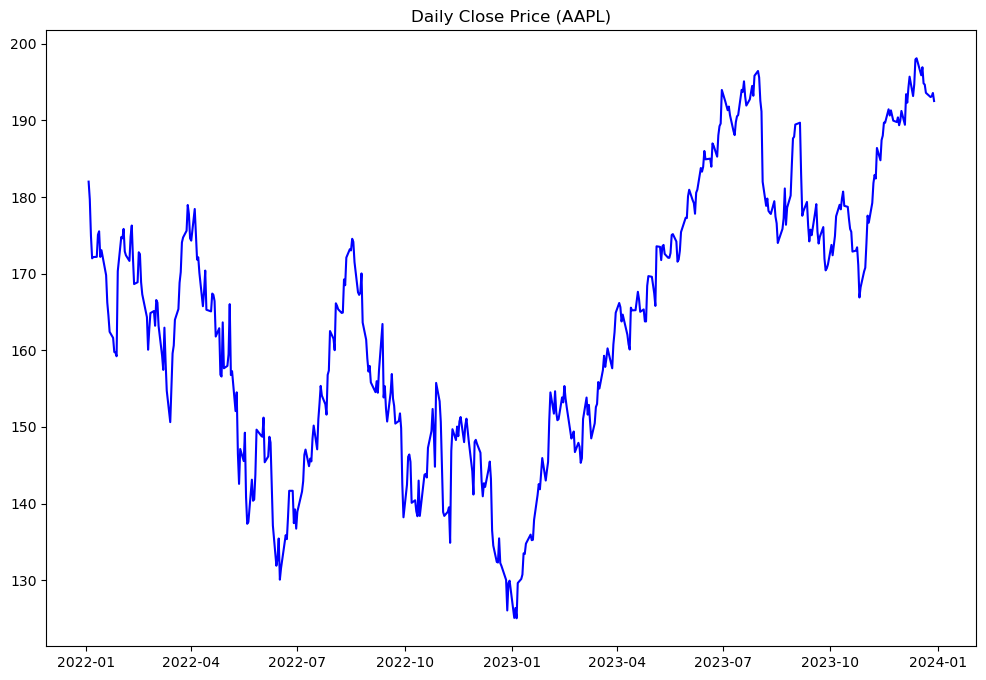

In [2]:
stock = 'AAPL'
start = '2022-01-01'
end = '2023-12-31'
stock_data = yf.download(stock, start=start, end=end)

plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], color='blue')
plt.title("Daily Close Price (AAPL)")
plt.show()

## 3. Simple Moving Average (SMA)
__Use Case:__ Simple Moving Averages (SMA) are used to smooth out short-term fluctuations in the stock price, providing a clearer trend indication. The 20-day and 50-day SMAs are calculated and plotted alongside the daily closing prices. Investors often use SMAs to identify trends and potential reversal points.

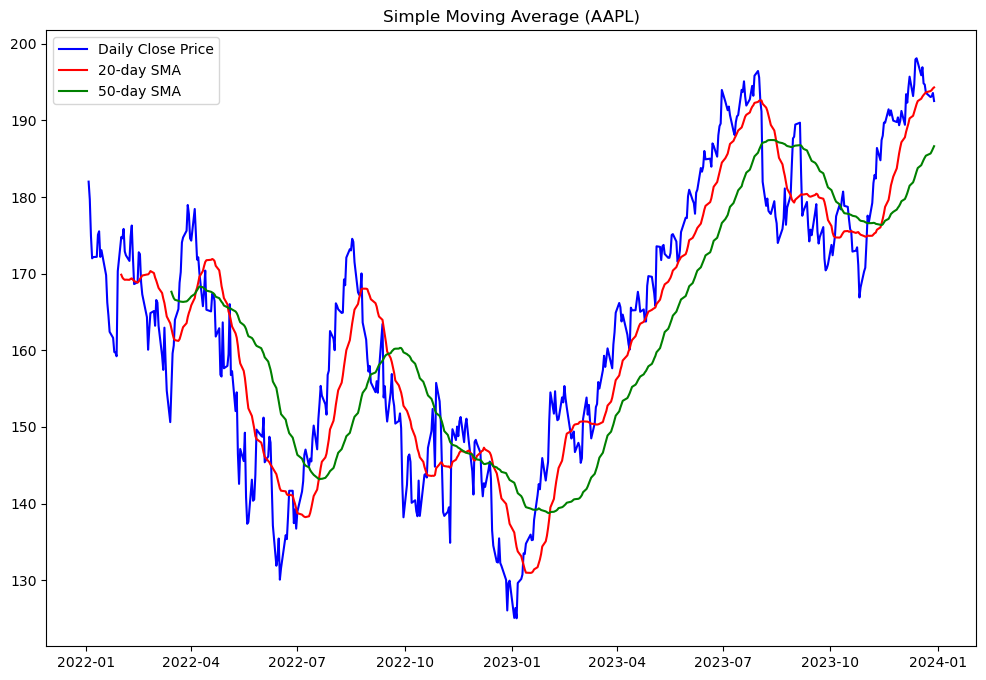

In [3]:
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], color='blue', label='Daily Close Price')
plt.plot(stock_data.index, stock_data['SMA_20'], color='red', label='20-day SMA')
plt.plot(stock_data.index, stock_data['SMA_50'], color='green', label='50-day SMA')
plt.legend()
plt.title("Simple Moving Average (AAPL)")
plt.show()


## 4. Exponential Moving Average (EMA)
__Use Case:__ Exponential Moving Averages (EMA) give more weight to recent prices, making them more responsive to price changes. The 20-day and 50-day EMAs are calculated and plotted alongside the daily closing prices. EMAs are useful for capturing recent price movements and are often employed in trend-following strategies.

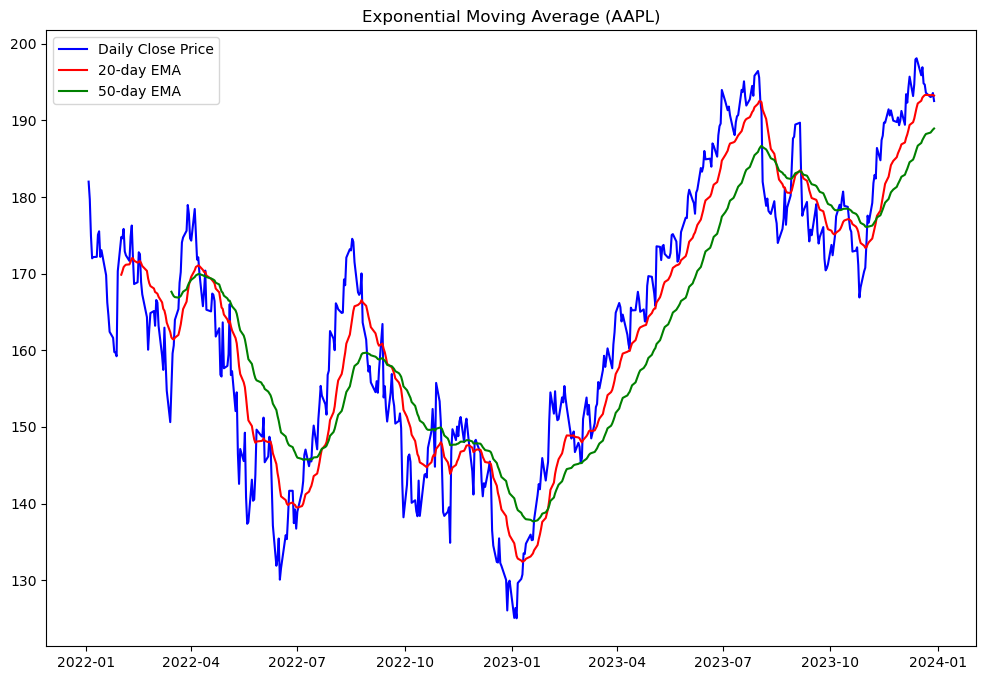

In [4]:
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)
stock_data['EMA_50'] = talib.EMA(stock_data['Close'], timeperiod=50)
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], color='blue', label='Daily Close Price')
plt.plot(stock_data.index, stock_data['EMA_20'], color='red', label='20-day EMA')
plt.plot(stock_data.index, stock_data['EMA_50'], color='green', label='50-day EMA')
plt.legend()
plt.title("Exponential Moving Average (AAPL)")
plt.show()


## 5. SMA vs EMA Comparison

__Use Case:__ This section compares the 50-day Simple Moving Average (SMA) with the 50-day Exponential Moving Average (EMA). The comparison helps traders and analysts evaluate the sensitivity of each moving average type to recent price changes. It assists in choosing the appropriate moving average for specific analysis needs.

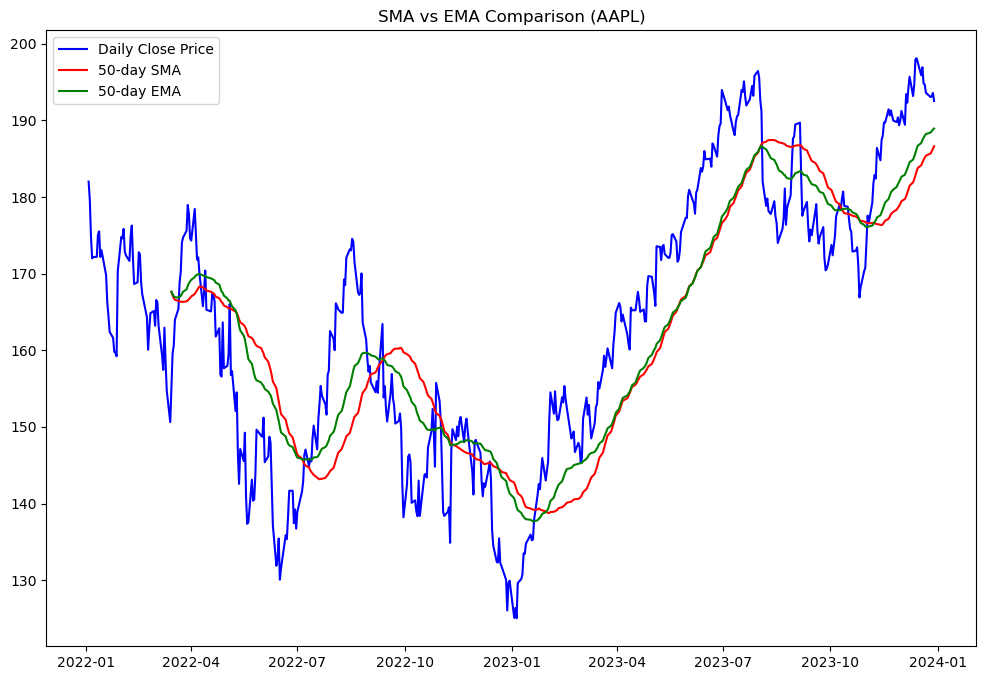

In [5]:
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], color='blue', label='Daily Close Price')
plt.plot(stock_data.index, stock_data['SMA_50'], color='red', label='50-day SMA')
plt.plot(stock_data.index, stock_data['EMA_50'], color='green', label='50-day EMA')
plt.legend()
plt.title("SMA vs EMA Comparison (AAPL)")
plt.show()


## 6. Average Directional Index (ADX)

__Use Case:__ The Average Directional Index (ADX) measures the strength of a trend, not its direction. It is used to identify the strength of a trend and potential trend reversal points. The ADX values, along with the price chart, help traders assess whether a stock is in a strong trend or is ranging.

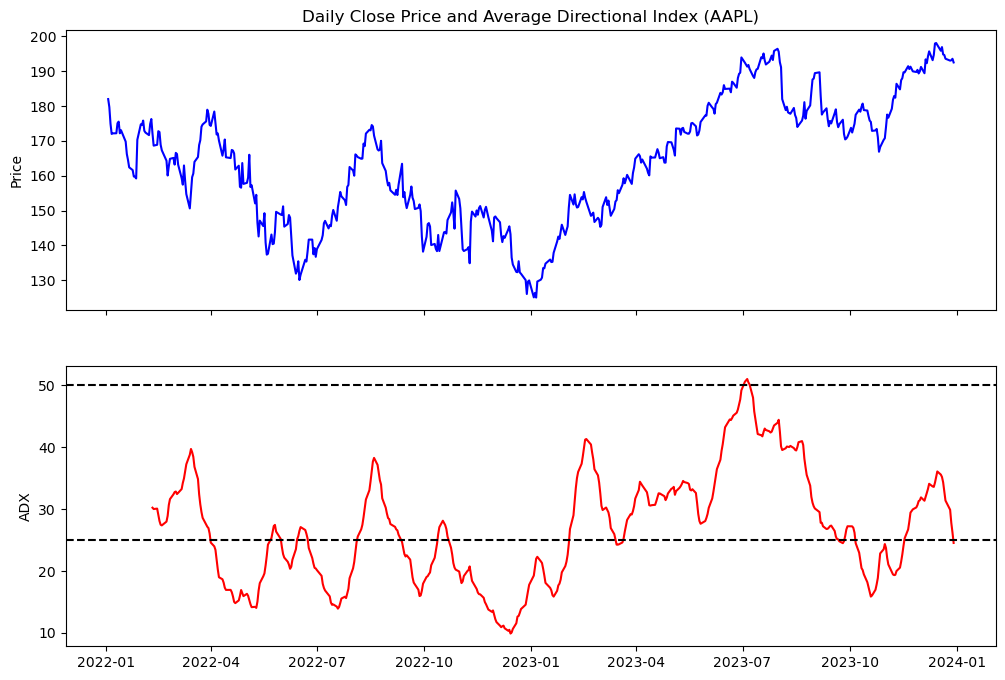

In [6]:
stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)
ax1.plot(stock_data.index, stock_data['Close'], color='blue', label='Daily Close Price')
ax1.set_ylabel('Price')
ax1.set_title('Daily Close Price and Average Directional Index (AAPL)')
ax2.plot(stock_data.index, stock_data['ADX'], color='red', label='ADX')
ax2.set_ylabel('ADX')
ax2.axhline(y=25, color='black', linestyle='--')
ax2.axhline(y=50, color='black', linestyle='--')
plt.show()




## 7. Moving Average Convergence Divergence (MACD)
__Use Case:__ The Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator. It helps identify the strength and direction of a trend and potential reversal points. The MACD line, signal line, and histogram are plotted to visualize changes in momentum and potential buy or sell signals.

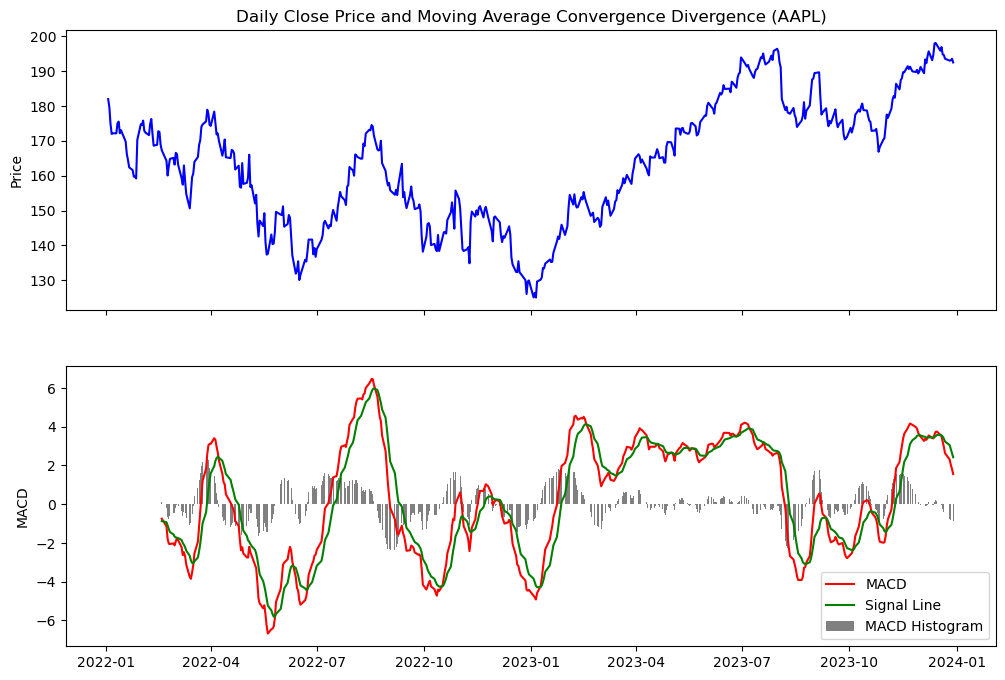

In [7]:
stock_data['MACD'], stock_data['MACD_Signal'], stock_data['MACD_Hist'] = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)
ax1.plot(stock_data.index, stock_data['Close'], color='blue', label='Daily Close Price')
ax1.set_ylabel('Price')
ax1.set_title('Daily Close Price and Moving Average Convergence Divergence (AAPL)')
ax2.plot(stock_data.index, stock_data['MACD'], color='red', label='MACD')
ax2.plot(stock_data.index, stock_data['MACD_Signal'], color='green', label='Signal Line')
ax2.bar(stock_data.index, stock_data['MACD_Hist'], color='grey', label='MACD Histogram')
ax2.set_ylabel('MACD')
plt.legend()
plt.show()

## 8. Relative Strength Index (RSI)
__Use Case:__ The Relative Strength Index (RSI) is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions. The RSI values, along with the price chart, help traders assess whether a stock is overbought or oversold and potential trend reversal points.

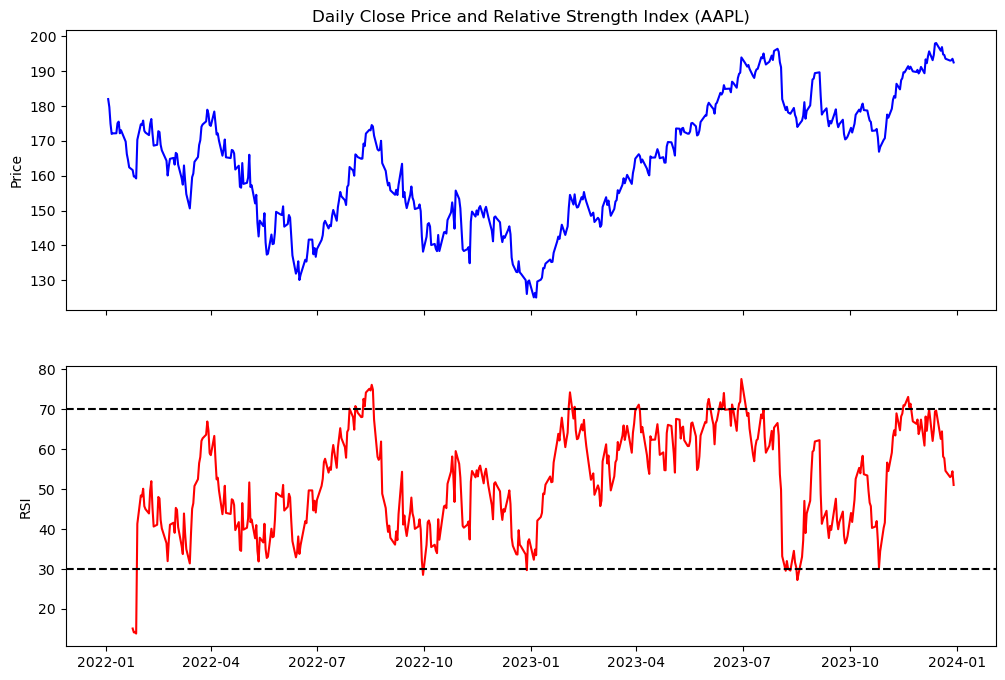

In [8]:
stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)
ax1.plot(stock_data.index, stock_data['Close'], color='blue', label='Daily Close Price')
ax1.set_ylabel('Price')
ax1.set_title('Daily Close Price and Relative Strength Index (AAPL)')
ax2.plot(stock_data.index, stock_data['RSI'], color='red', label='RSI')
ax2.axhline(y=30, color='black', linestyle='--')
ax2.axhline(y=70, color='black', linestyle='--')
ax2.set_ylabel('RSI')
plt.show()


## 9. Bollinger Bands (BBANDS)
__Use Case:__ Bollinger Bands (BBANDS) are used to measure the volatility of a stock. They are plotted two standard deviations above and below a simple moving average. The bands widen when volatility increases and narrow when volatility decreases. Bollinger Bands are useful for identifying overbought and oversold conditions.

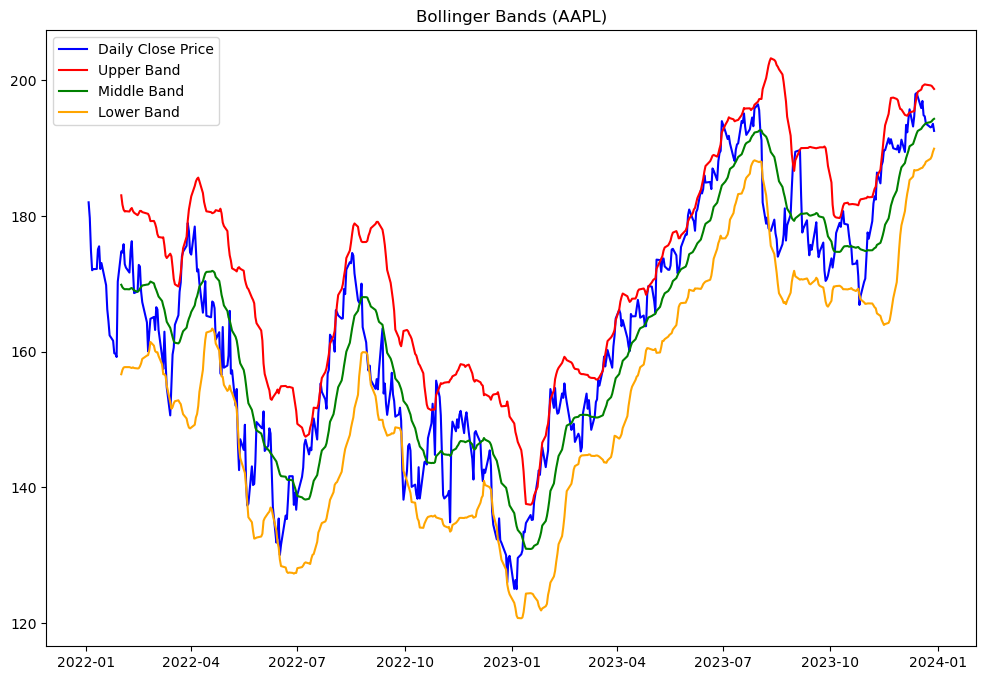

In [9]:
stock_data['BBANDS_Upper'], stock_data['BBANDS_Middle'], stock_data['BBANDS_Lower'] = talib.BBANDS(stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], color='blue', label='Daily Close Price')
plt.plot(stock_data.index, stock_data['BBANDS_Upper'], color='red', label='Upper Band')
plt.plot(stock_data.index, stock_data['BBANDS_Middle'], color='green', label='Middle Band')
plt.plot(stock_data.index, stock_data['BBANDS_Lower'], color='orange', label='Lower Band')
plt.legend()
plt.title("Bollinger Bands (AAPL)")
plt.show()
